when all events are equally likely to happen:
$\newline$
$P(A)=\frac{|A|}{|S|}$



In [2]:
A = [1,2] # success events
S = [1,2,3,4,5,6] # Sample space
propA = len(A)/len(S)
print(propA)


0.3333333333333333


For any event E, the probability P(E) is non-negative:
$$ P(E) \geq 0 $$

For any two disjoint events E and F, the probability of their union is the sum of their individual probabilities:
$$ P(E \cup F) = P(E) + P(F) $$


Sampling with or without replacement:
$Possibilities = n^k$

In [ ]:
# we want to draw k samples from n values
n = 6 
k = 6 
Possibilities = n ** k
print(Possibilities)

Sampling without Replacement and with Ordering: 
$$Possibilities = \frac{n!}{(n - k)!}$$

In [ ]:
import math
# we want to draw k samples from n values
n = 6 
k = 6 
Possibilities = math.factorial(n) / math.factorial(n - k)
print(Possibilities)

Sampling without Replacement and without Ordering:
$$Possibilities = (n choose k) = \frac{n!}{(n-k)!*k!}$$

In [ ]:
import math
# we want to draw k samples from n values
n = 6 
k = 6 
Possibilities = math.factorial(n) / math.factorial(k) * (math.factorial(n - k))
print(Possibilities)

Sampling with replacement and without ordering:
$$Possibilities = \frac{(n + k - 1)!}{k! * (n - 1)!}$$


In [ ]:
import math
# we want to draw k samples from n values
n = 6 
k = 6 
Possibilities = math.factorial(n + k - 1) / (math.factorial(k) * (math.factorial(n - 1)))
print(Possibilities)

Bayes formula:

$$P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}$$


In [7]:
def bayes_formula(prob_a_sent, prob_b_sent, prob_a_sent_fail, prob_b_sent_fail):
    # Calculate the probability of A given evidence
    prob_a_given_received = (prob_a_sent * (1 - prob_a_sent_fail)) / (
                (prob_a_sent * (1 - prob_a_sent_fail)) + (prob_b_sent * prob_b_sent_fail))
    return prob_a_given_received


# Inputs
prob_a_sent = 12/30
prob_b_sent = 20/35
prob_a_sent_fail = 1 / 2
prob_b_sent_fail = 1 / 2

# Calculate probability using Bayes' formula
result_a = bayes_formula(prob_a_sent, prob_b_sent, prob_a_sent_fail, prob_b_sent_fail)
# Calculate probability using Bayes' formula
result_b = bayes_formula(prob_b_sent, prob_a_sent, prob_b_sent_fail, prob_a_sent_fail)

# Calculate the probability that A is received
prob_a_received = (1-prob_a_sent_fail)*prob_a_sent+prob_b_sent_fail*prob_b_sent

# Calculate the probability that A is received
prob_b_received = (1-prob_b_sent_fail)*prob_b_sent+prob_a_sent_fail*prob_a_sent

# Print the result
print("Probability of A sent given A is received:", result_a)
print("Probability of B sent given A is received:", 1 - result_a)

print("\n")

print("Probability of B sent given B is received:", result_b)
print("Probability of A sent given B is received:", 1 - result_b)

# Print the probability that A is received
print("Probability that A is received:", prob_a_received)

# Print the probability that B is received
print("Probability that B is received:", prob_b_received)


Probability of A sent given A is received: 0.411764705882353
Probability of B sent given A is received: 0.588235294117647


Probability of B sent given B is received: 0.5882352941176471
Probability of A sent given B is received: 0.4117647058823529
Probability that A is received: 0.4857142857142857
Probability that B is received: 0.4857142857142857


Cumulative Distribution function (CDF):
$$F(a) = \sum_{all x \leq a} P(x)$$

CDF: [0.2, 0.5, 1.0] 0.5


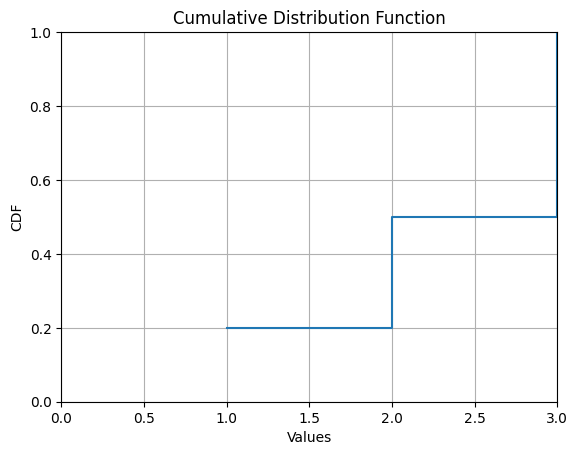

In [38]:
import matplotlib.pyplot as plt

def cdf(a, probabilities):
    # Calculate the cumulative distribution function (CDF)
    cdf = 0
    cdf_values = []  # List to store the CDF values
    for x in (probabilities.keys()):
        if x <= a:
            cdf += probabilities[x]
        cdf_values.append(cdf)
    return cdf_values

# Example usage
probabilities = {1: 0.2, 2: 0.3, 3: 0.5}  # Dictionary of probabilities for each value

a = 3  # Value of how much to calculate of the x axis

cdf_values = cdf(a, probabilities)
print("CDF:", cdf_values, sum(probabilities[x] for x in probabilities if x < a))

# Plotting the CDF
x_values = sorted(probabilities.keys())
plt.step(x_values, cdf_values, where='post')
plt.xlabel('Values')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function')
plt.ylim(0, 1)  # Set the y-axis limits to match the CDF range
plt.xlim(0, a)  # Set the x-axis limits to match the CDF range
plt.grid(True)
plt.show()

Probability mass function (PMF) for discrete R.V:
$$p(x) = P(X = x)$$


In [16]:
def pmf(x, probabilities):
    # Calculate the probability mass function (PMF) for a discrete random variable
    if x in probabilities:
        return probabilities[x]
    else:
        return 0

# Example usage
probabilities = {1: 0.2, 2: 0.3, 3: 0.5}  # Dictionary of probabilities for each value

x = 2  # Value of how much to calculate of the x axis

pmf_value = pmf(x, probabilities)
print("PMF:", pmf_value)



PMF: 0.3


Probability density function (PDF) continuous r.v:
$$P(a \leq X < b) = \int_{a}^{b} f(x) dx$$



PDF: 2.3333333333333335


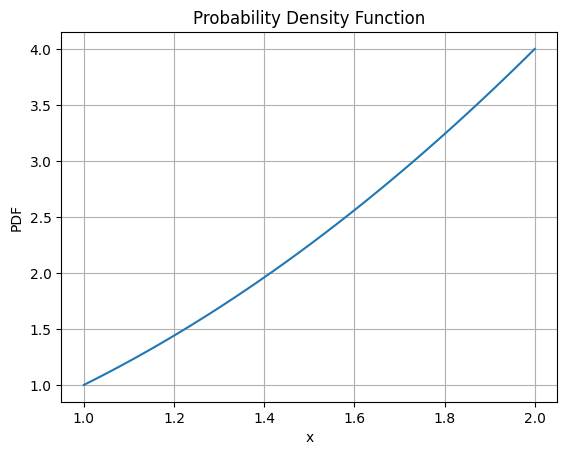

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

def pdf(a, b, pdf_function):
    # Calculate the probability density function (PDF)
    result, _ = spi.quad(pdf_function, a, b)
    return result

# Example usage
def pdf_function(x):
    # Define the probability density function (PDF)
    # Replace with your own function or distribution
    return x**2

a = 1.0  # Lower bound
b = 2.0  # Upper bound

pdf_value = pdf(a, b, pdf_function)
print("PDF:", pdf_value)

# Plotting the PDF
x = np.linspace(a, b, 100)  # Create 100 equally spaced points between a and b
y = pdf_function(x)         # Evaluate the PDF function at each point

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.grid(True)
plt.show()



Mixed type:
$$F(x) = p_1 * F_1(x) + p_2 * F_2(x) + ... + p_n * F_n(x)$$


In [ ]:
def cdf(x, probabilities, cdfs):
    # Calculate the cumulative distribution function (CDF)
    cdf = 0
    for i in range(len(probabilities)):
        cdf += probabilities[i] * cdfs[i](x)
    return cdf

# Example usage
probabilities = [0.2, 0.3, 0.5]  # List of probabilities
cdfs = [cdf1, cdf2, cdf3]  # List of CDF functions for each distribution

x = 2.0  # Value at which to compute the CDF

cdf_value = cdf(x, probabilities, cdfs)
print("CDF:", cdf_value)


Multiple r.v joint CDF:
$$F(x, y) = P(X \leq x, Y \leq y)$$

In [ ]:
def joint_cdf(x, y, probabilities):
    # Calculate the joint cumulative distribution function (CDF) for two random variables
    cdf = 0
    for (x_val, y_val), prob in probabilities.items():
        if x_val <= x and y_val <= y:
            cdf += prob
    return cdf

# Example usage
probabilities = { (1, 2): 0.1, (2, 3): 0.2, (3, 4): 0.3, (4, 5): 0.4 }  # Dictionary of probabilities for each (x, y) pair

x = 3.5  # Value for the first random variable
y = 4.2  # Value for the second random variable

cdf_value = joint_cdf(x, y, probabilities)
print("Joint CDF:", cdf_value)

Joint distributed disrete r.vs. 
joint pmf:
$$p(x_i, y_i) = P(X = x_i, Y = y_i)$$

In [ ]:
def joint_pmf(x, y, probabilities):
    # Calculate the joint probability mass function (PMF) for two random variables
    if (x, y) in probabilities:
        pmf = probabilities[(x, y)]
    else:
        pmf = 0
    return pmf

# Example usage
probabilities = { (1, 2): 0.1, (2, 3): 0.2, (3, 4): 0.3, (4, 5): 0.4 }  # Dictionary of probabilities for each (x, y) pair

x = 2  # Value for the first random variable
y = 3  # Value for the second random variable

pmf_value = joint_pmf(x, y, probabilities)
print("Joint PMF:", pmf_value)

Jointly distributed continous r.vs.
$$P\{(X, Y) \in C\} = \int\int_{(x, y) \in C} f(x, y) \, dx \, dy$$

In [ ]:
import scipy.integrate as spi

def probability_in_region(region, joint_pdf_function):
    # Calculate the probability of the event (X, Y) belonging to the given region
    result, _ = spi.dblquad(joint_pdf_function, region[0], region[1], lambda x: region[2](x), lambda x: region[3](x))
    return result

# Example usage
def joint_pdf_function(x, y):
    # Define the joint probability density function (PDF) for (X, Y)
    # Replace with your own function or distribution
    return x * y

region = [1, 2, lambda x: x, lambda x: 2 * x]  # Region defined as [x_min, x_max, y_min_function, y_max_function]

probability = probability_in_region(region, joint_pdf_function)
print("Probability:", probability)

If you are talking about independent r.v.
You can split the formels:
CDF:
$$F(A, B) = F_X(A) \cdot F_Y(B)$$
In terms of probability mass function (PMF) for discrete random variables (rv) and probability density function (PDF) for continuous random variables:
$$p(x, y) = p_X(x) \cdot p_Y(y)$$
$$f(x, y) = f_X(x) \cdot f_Y(y)$$
Basically, X and Y are independent if knowing the value of one does not change the distribution of another.


The relationship between two random variables can often be clarified by consideration of the conditional distribution of one given the value of the other.

The conditional probability mass function (PMF) of X given that Y=y is defined by:
$$p_{X|Y}(x|y) = P(X=x|Y=y) = \frac{P(X, Y)}{P_Y(y)}$$

If X and Y have a joint probability density function (PDF), then the conditional probability density function (PDF) of X given that Y=y is defined as:
$$f_{X|Y}(x|y) = \frac{f(x, y)}{f_Y(y)}$$
